/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Google Play Store Analysis/googleplaystore.csv

/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Google Play Store Analysis/googleplaystore_user_reviews.csv

#***Import Modules***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#***Loading the Dataset***

In [2]:
df_store = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/Google Play Store Analysis/googleplaystore.csv')

In [3]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#***Data-Cleaning & Pre-processing***

In [7]:
df_store.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [8]:
df_store.dropna(inplace = True)
df_store.drop_duplicates(inplace = True)

In [9]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [11]:
df_store.duplicated().sum()

0

In [13]:
df_store['Installs'] = df_store['Installs'].str.replace('+', '')
df_store['Installs'] = df_store['Installs'].str.replace(',', '')

df_store['Installs'] = df_store['Installs'].astype(int)

df_store['Reviews'] = df_store['Reviews'].astype(int)

<ipython-input-13-e5b1c65b85b9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_store['Installs'] = df_store['Installs'].str.replace('+', '')


In [14]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#Bar Plot

Text(0.5, 1.0, 'Distribution of App Categories')

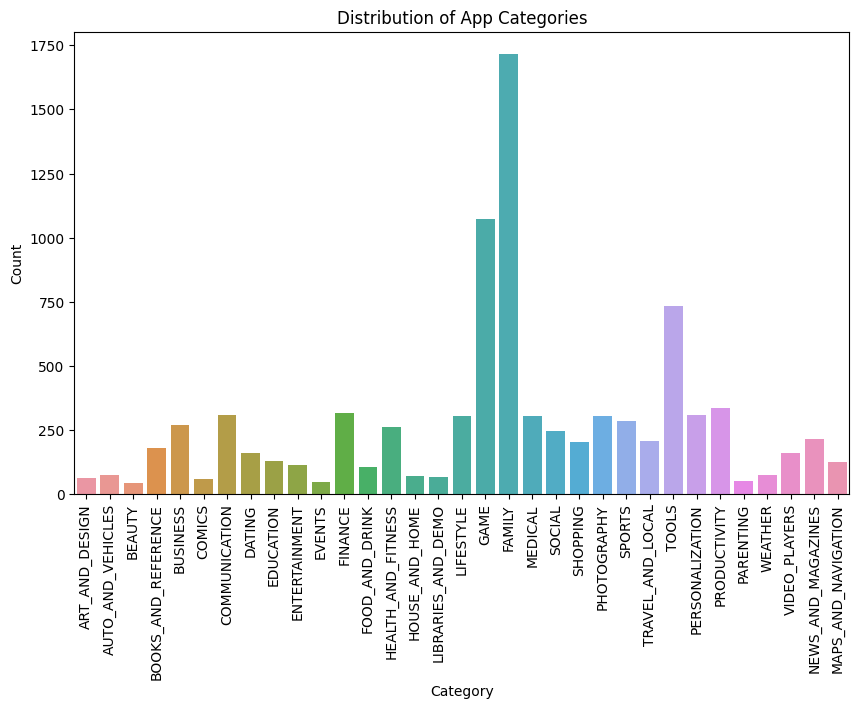

In [16]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df_store, x = 'Category')
plt.xlabel('Category')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Distribution of App Categories')

#**Scatter Plot**

Text(0.5, 1.0, 'Relationship between Reviews and Rating')

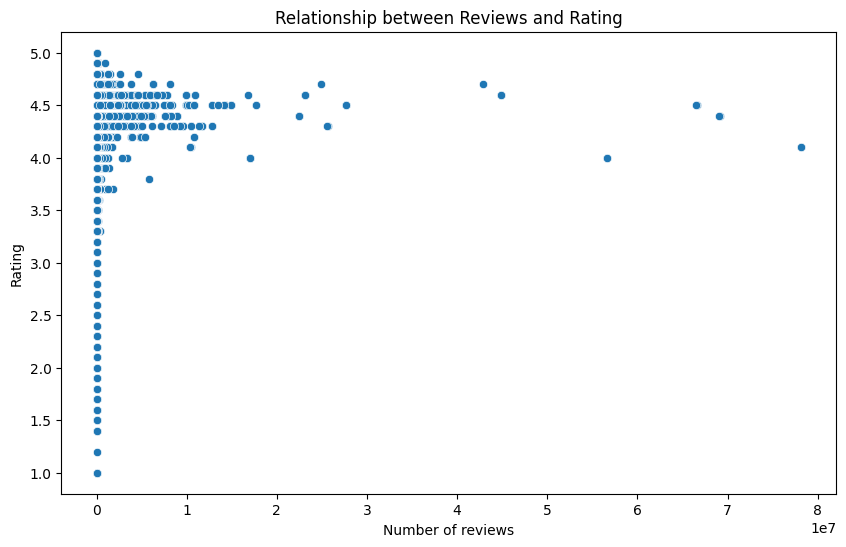

In [18]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_store, x = 'Reviews', y = 'Rating')
plt.xlabel('Number of reviews')
plt.ylabel('Rating')
plt.title('Relationship between Reviews and Rating')

#**Box Plot**

Text(0.5, 1.0, 'Distribution of Installs across Categories')

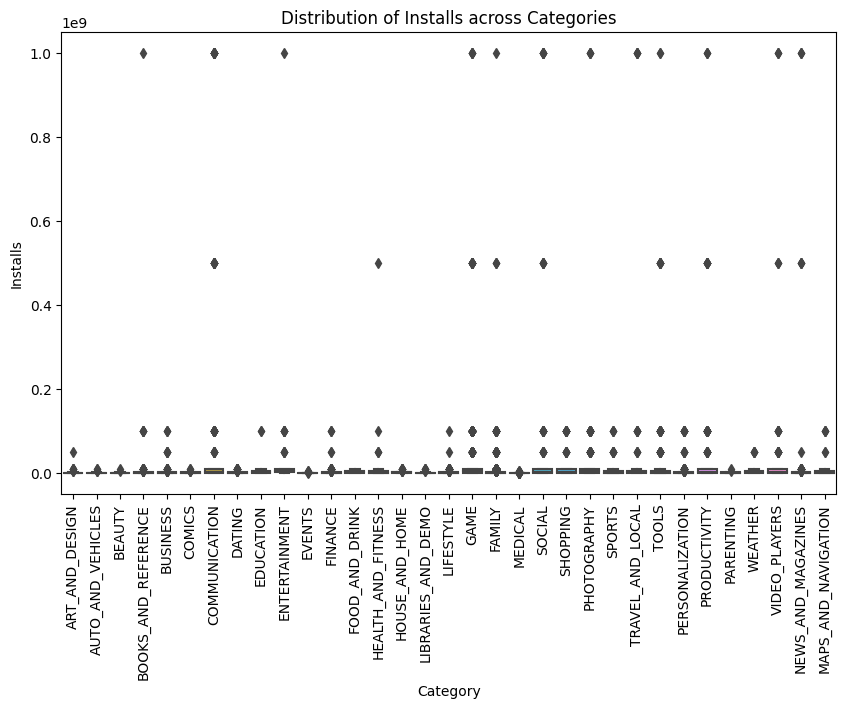

In [21]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_store, x = 'Category', y = 'Installs')
plt.xlabel('Category')
plt.xticks(rotation = 90)
plt.ylabel('Installs')
plt.title('Distribution of Installs across Categories')

#**Scatter Plot**

#***Statistical Analysis & Hypothesis testing***

In [25]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
from scipy.stats import ttest_ind

free_apps = df_store[df_store['Type'] == 'Free']
paid_apps = df_store[df_store['Type'] == 'Paid']

In [26]:
t_stat, p_value = ttest_ind(free_apps['Rating'], paid_apps['Rating'])

In [27]:
if p_value < 0.05:
  print("Reject null hypothesis: There is a significant difference in ratings.")
else:
  print("Fail to reject null hypothesis: There is no significant difference in ratings.")

Reject null hypothesis: There is a significant difference in ratings.


Text(0.5, 1.0, 'Relationship between Ratings and Installs')

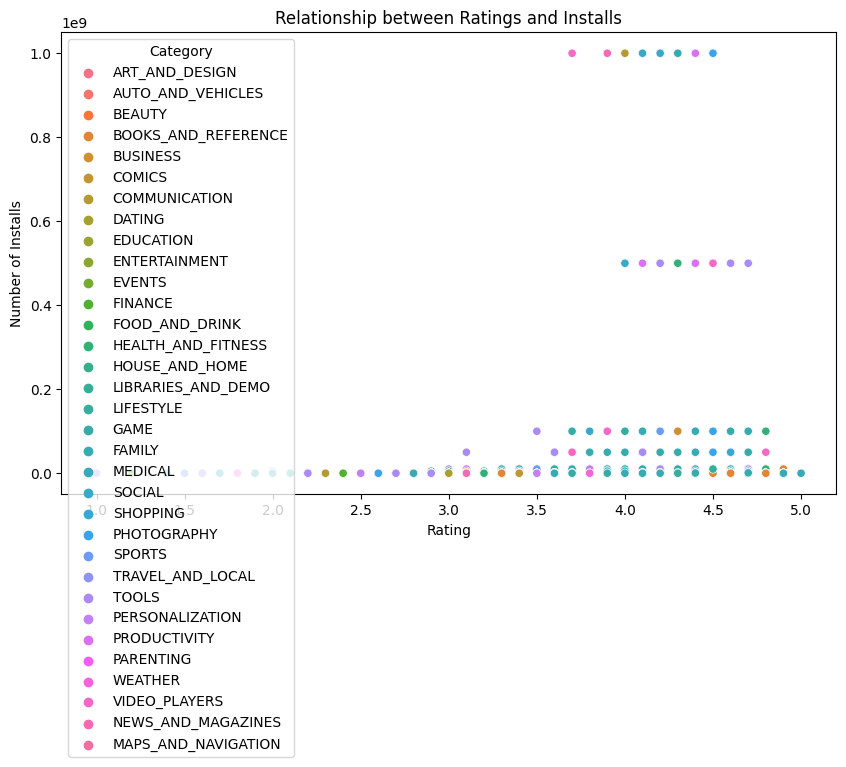

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df_store, x = 'Rating', y = 'Installs', hue = 'Category')
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.title('Relationship between Ratings and Installs')

#**Line Plot**

Text(0.5, 1.0, 'Average Rating Trend over Time')

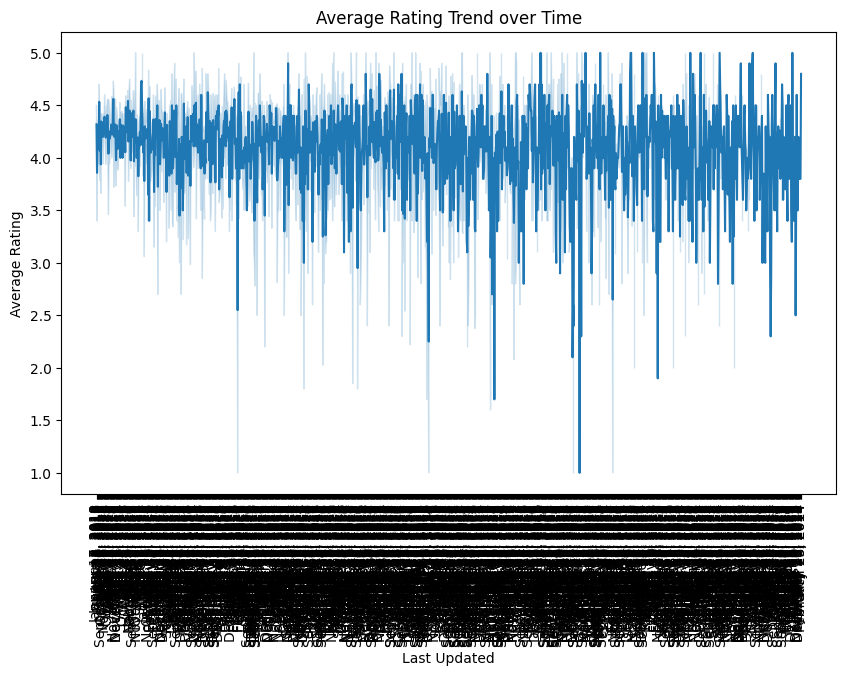

In [36]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df_store, x = 'Last Updated', y = 'Rating')
plt.xlabel('Last Updated')
plt.xticks(rotation = 90)
plt.ylabel('Average Rating')
plt.title('Average Rating Trend over Time')

In [37]:
df_store['Last Updated'] = pd.to_datetime(df_store['Last Updated'])
df_store.set_index('Last Updated', inplace = True)
df_store_monthly = df_store['Rating'].resample('M').mean()

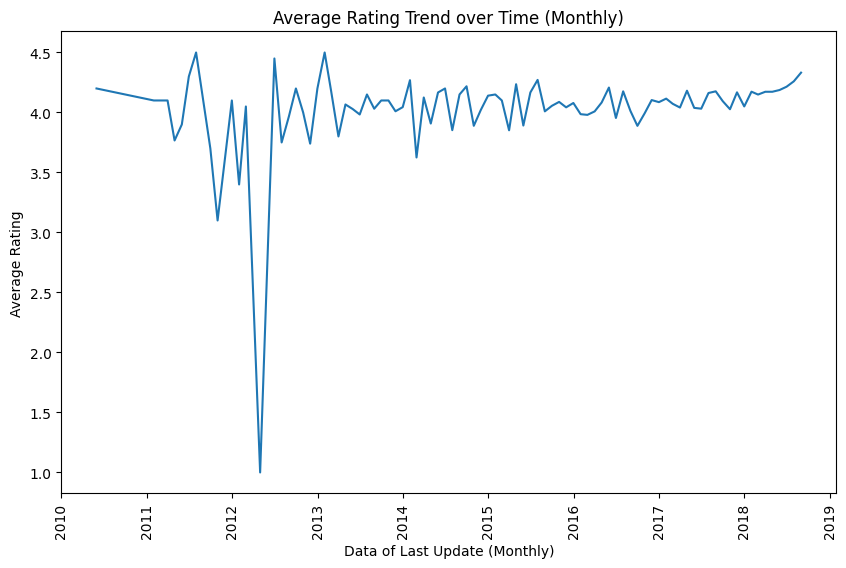

In [38]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df_store_monthly)
plt.xlabel('Data of Last Update (Monthly)')
plt.xticks(rotation = 90)
plt.ylabel('Average Rating')
plt.title('Average Rating Trend over Time (Monthly)')
plt.show()

In [ ]:
z_scores = np.abs((df_store['Rating'] - df_store['Rating'].mean()) / df_store['Rating'].std())
df_store = df_store[z_scores < 3]